<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_nine_(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
!pip install swig

In [2]:
!pip install gymnasium[box2d]

In [3]:
!pip install renderlab

In [4]:
!pip install stable-baselines3

# Import Libraries

In [ ]:
import gymnasium as gym
import renderlab
import numpy as np
from stable_baselines3 import DQN, PPO
import os
import pandas as pd
import matplotlib.pyplot as plt
import time
from stable_baselines3.common.monitor import Monitor

# Question 2

## **step(action)**

Η συνάρτηση **step(action)** εκτελεί μία ενέργεια (**action**) που επιλέγεται από τον πράκτορα και ενημερώνει την κατάσταση του περιβάλλοντος.

Επιστρέφει πέντε στοιχεία:

  - **observation**: τη νέα κατάσταση του περιβάλλοντος

  - **reward**: την άμεση ανταμοιβή για την ενέργεια

  - **terminated**: αν το επεισόδιο ολοκληρώθηκε λόγω επιτυχίας ή αποτυχίας

  - **truncated**: αν το επεισόδιο τερματίστηκε λόγω χρονικού ορίου

  - **info**: πρόσθετες πληροφορίες

Η συνάρτηση αυτή αποτελεί τον βασικό μηχανισμό μάθησης, καθώς συνδέει τις ενέργειες του πράκτορα με τις ανταμοιβές.

Παράδειγμα:

  `observation, reward, terminated, truncated, info = env.step(action)`


## **reset()**

Η συνάρτηση **reset()** χρησιμοποιείται για την αρχικοποίηση ή επαναφορά του περιβάλλοντος στην αρχική του κατάσταση. Καλείται στην αρχή κάθε επεισοδίου (**episode**).

Επιστρέφει:

- την αρχική παρατήρηση (observation), δηλαδή την αρχική κατάσταση του περιβάλλοντος

- ένα λεξικό **info** με επιπλέον πληροφορίες (προαιρετικές)

Η χρήση της εξασφαλίζει ότι κάθε επεισόδιο ξεκινά από τις ίδιες ή ισοδύναμες αρχικές συνθήκες.

Παράδειγμα:

  `observation, info = env.reset()`

## **render()**

Η συνάρτηση **render()** χρησιμοποιείται για την οπτικοποίηση της τρέχουσας κατάστασης του περιβάλλοντος. Ανάλογα με το **render_mode**, η απεικόνιση μπορεί να γίνει σε παράθυρο (local execution) ή ως εικόνες/frames (π.χ. σε Google Colab).

Στο Google Colab, επειδή δεν υποστηρίζεται γραφικό περιβάλλον, η οπτικοποίηση γίνεται με τη χρήση βιβλιοθηκών όπως το **renderlab**, οι οποίες συλλέγουν τα frames και τα εμφανίζουν ως animation.

Παράδειγμα:

  ``` env.render() ```



# Question 3

## Observation Space

Ο χώρος παρατηρήσεων (**Observation Space**) αποτελείται από ένα διάνυσμα 8 συνεχών μεταβλητών, το οποίο περιγράφει πλήρως τη φυσική κατάσταση του διαστημοπλοίου σε κάθε χρονικό βήμα.

Οι μεταβλητές είναι οι εξής:

    1. Οριζόντια θέση του σκάφους (x)

    2. Κατακόρυφη θέση του σκάφους (y)

    3. Οριζόντια ταχύτητα

    4. Κατακόρυφη ταχύτητα

    5. Γωνία κλίσης του σκάφους

    6. ωνιακή ταχύτητα

    7. Επαφή αριστερού ποδιού με το έδαφος (0 ή 1)

    8. Επαφή δεξιού ποδιού με το έδαφος (0 ή 1)

Ο χώρος παρατηρήσεων ορίζεται ως:

  `Box(-∞, +∞, (8,), float32)`


Οι πρώτες έξι μεταβλητές είναι συνεχείς, ενώ οι δύο τελευταίες είναι δυαδικές και υποδεικνύουν αν το σκάφος έχει έρθει σε επαφή με το έδαφος.

## Action Space

Ο χώρος ενεργειών (**Action Space**) είναι διακριτός και περιλαμβάνει τέσσερις δυνατές ενέργειες, οι οποίες αντιστοιχούν στη χρήση των κινητήρων του διαστημοπλοίου.

Ορίζεται ως:

  `Discrete(4)`

Οι ενέργειες είναι:

  - 0 =>  Καμία ενέργεια
  - 1 => Ενεργοποίηση αριστερού κινητήρα
  - 2 => Ενεργοποίηση κύριου κινητήρα
  - 3 => Ενεργοποίηση δεξιού κινητήρα

Ο πράκτορας επιλέγει μία από τις παραπάνω ενέργειες σε κάθε χρονικό βήμα.

## Reward Function

Η συνάρτηση ανταμοιβής (**Reward Function**) έχει σχεδιαστεί ώστε να ενθαρρύνει την ομαλή και ασφαλή προσγείωση του διαστημοπλοίου στο προκαθορισμένο σημείο.

Τα βασικά χαρακτηριστικά της είναι:

  - Θετική ανταμοιβή για προσέγγιση στο κέντρο της πλατφόρμας προσγείωσης

  - Πρόσθετη ανταμοιβή για χαμηλή ταχύτητα και μικρή γωνία κατά την προσγείωση

  - Bonus όταν τα πόδια του σκάφους έρθουν σε επαφή με το έδαφος

  - Ποινή για χρήση κινητήρων (κατανάλωση καυσίμου)

  - Μεγάλη αρνητική ανταμοιβή σε περίπτωση σύγκρουσης ή αποτυχημένης προσγείωσης

Συγκεκριμένα:

  - Επιτυχής προσγείωση: **+100 έως +140**

  - Σύγκρουση (crash): **−100**

  - Συνεχείς μικρές ποινές για υψηλή ταχύτητα, μεγάλη κλίση και υπερβολική χρήση κινητήρων

Η μορφή της ανταμοιβής καθοδηγεί τον πράκτορα ώστε να επιτυγχάνει προσγείωση με ελάχιστη ταχύτητα, μικρή κλίση και περιορισμένη κατανάλωση ενέργειας.

# Question 4

In [15]:
# Initialize the LunarLander-v3 environment
# Use render_mode="rgb_array" so that renderlab can capture the visual frames
env = gym.make("LunarLander-v3", render_mode="rgb_array")

# Apply the renderlab Wrapper to save the video in the "./video" directory
env = renderlab.RenderFrame(env, "./video")

# Reset the environment to the starting state
observation, info = env.reset()

# Run the Random Agent until the episode ends (Terminated or Truncated)
terminated = False
truncated = False

while not (terminated or truncated):

    # Select a random action from the action space (0 to 3)
    # 0: Do nothing, 1: Fire left engine, 2: Fire main engine, 3: Fire right engine
    action = env.action_space.sample()

    # Apply the action to the environment
    observation, reward, terminated, truncated, info = env.step(action)

# Close the environment and display the captured video
env.close()
env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  99%|█████████▉| 104/105 [00:00<00:00, 224.53it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./video/1768034545.3229015.mp4, 720000 bytes wanted but 0 bytes read,at frame 104/105, at time 3.47/3.47 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Question 5

In [16]:
# Number of episodes to run
num_episodes = 5
all_episode_rewards = []

for episode in range(num_episodes):

    # Reset environment for a new episode
    observation, info = env.reset()

    episode_score = 0
    terminated = False
    truncated = False

    while not (terminated or truncated):

        # Random action selection
        action = env.action_space.sample()

        # Apply action
        observation, reward, terminated, truncated, info = env.step(action)
        episode_score += reward

    all_episode_rewards.append(episode_score)

    print(f"Episode {episode + 1}: Score = {episode_score:.2f}")

# Calculate and display the mean score
mean_score = np.mean(all_episode_rewards)
print("-" * 30)
print(f"Mean Score over {num_episodes} episodes: {mean_score:.2f}")

Episode 1: Score = -170.00
Episode 2: Score = -245.53
Episode 3: Score = -219.44
Episode 4: Score = -96.06
Episode 5: Score = -96.39
------------------------------
Mean Score over 5 episodes: -165.48


# Question 6

In [17]:
train_env = gym.make("LunarLander-v3")

TIMESTEPS = 50000

In [18]:
start = time.time()
dqn = DQN("MlpPolicy", train_env, verbose=1)
dqn.learn(total_timesteps=TIMESTEPS)
dqn_time = time.time() - start


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | -156     |
|    exploration_rate | 0.918    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1360     |
|    time_elapsed     | 0        |
|    total_timesteps  | 434      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates        | 83       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | -137     |
|    exploration_rate | 0.842    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1249     |
|    time_elapsed     | 0        |
|    total_timesteps  | 834      |
| train/              |        

In [19]:
start = time.time()
ppo = PPO("MlpPolicy", train_env, verbose=1)
ppo.learn(total_timesteps=TIMESTEPS)
ppo_time = time.time() - start

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.5     |
|    ep_rew_mean     | -160     |
| time/              |          |
|    fps             | 1159     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 91.8        |
|    ep_rew_mean          | -168        |
| time/                   |             |
|    fps                  | 736         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012780188 |
|    clip_fraction        | 0.0681      |
|    clip_range           | 0.2         |
|    entropy_loss   

# Question 7

In [21]:
def evaluate_agent(model, env, num_episodes=5):

    episode_rewards = []

    for _ in range(num_episodes):

        obs, _ = env.reset()
        terminated = truncated = False
        total_reward = 0

        while not (terminated or truncated):
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward

        episode_rewards.append(total_reward)

    return np.mean(episode_rewards), episode_rewards

In [22]:
eval_env = gym.make("LunarLander-v3")

dqn_mean, dqn_rewards = evaluate_agent(dqn, eval_env)
ppo_mean, ppo_rewards = evaluate_agent(ppo, eval_env)

print("DQN Mean:", dqn_mean)
print("PPO Mean:", ppo_mean)


DQN Mean: -107.6559652678319
PPO Mean: -281.4842014132006


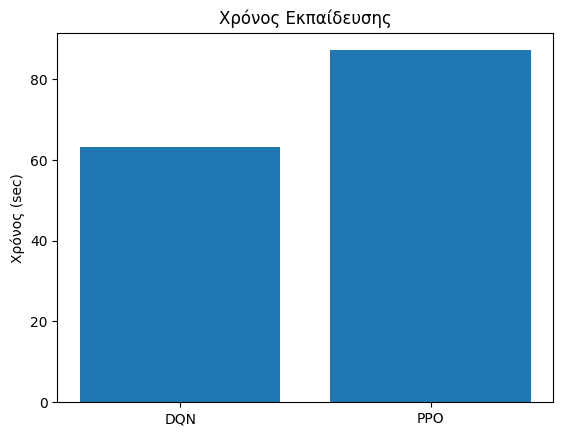

In [23]:
plt.bar(["DQN", "PPO"], [dqn_time, ppo_time])
plt.ylabel("Χρόνος (sec)")
plt.title("Χρόνος Εκπαίδευσης")
plt.show()


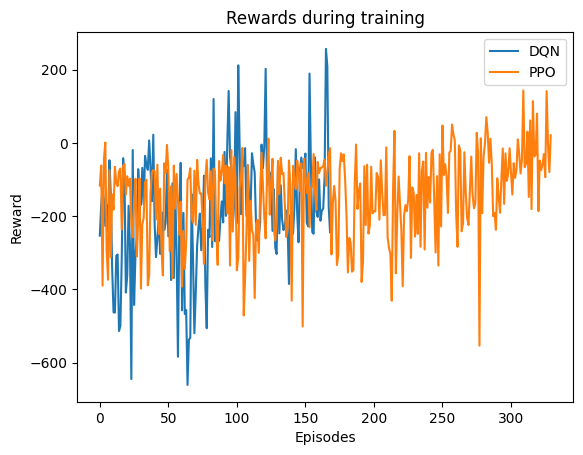

In [24]:
env_dqn = Monitor(gym.make("LunarLander-v3"))
env_ppo = Monitor(gym.make("LunarLander-v3"))

dqn = DQN("MlpPolicy", env_dqn)
dqn.learn(TIMESTEPS)

ppo = PPO("MlpPolicy", env_ppo)
ppo.learn(TIMESTEPS)

plt.plot(env_dqn.get_episode_rewards(), label="DQN")
plt.plot(env_ppo.get_episode_rewards(), label="PPO")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Rewards during training")
plt.show()

# Question 8

## Training with New Parameters

In [27]:
env_dqn = Monitor(gym.make("LunarLander-v3"))

start = time.time()
dqn_opt = DQN(
    "MlpPolicy",
    env_dqn,
    learning_rate=1e-4,
    buffer_size=100000,
    batch_size=64,
    gamma=0.99,
    exploration_fraction=0.1,
    target_update_interval=1000,
    train_freq=4,
    verbose=1
)
dqn_opt.learn(total_timesteps=100000)
dqn_time_opt = time.time() - start


Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | -278     |
|    exploration_rate | 0.96     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1317     |
|    time_elapsed     | 0        |
|    total_timesteps  | 417      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92     |
|    n_updates        | 79       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.9     |
|    ep_rew_mean      | -265     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1212     |
|    time_elapsed     | 0        |
|    total_timesteps  | 791      |
| train/              |          |
|    learning_rate    | 0.0001   |
|  

In [28]:
env_ppo = Monitor(gym.make("LunarLander-v3"))

start = time.time()
ppo_opt = PPO(
    "MlpPolicy",
    env_ppo,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,
    verbose=1
)
ppo_opt.learn(total_timesteps=100000)
ppo_time_opt = time.time() - start

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 93       |
|    ep_rew_mean     | -206     |
| time/              |          |
|    fps             | 743      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 96.5         |
|    ep_rew_mean          | -192         |
| time/                   |              |
|    fps                  | 701          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0054660016 |
|    clip_fraction        | 0.0179       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    e

## Evaluation - Through Rewards

In [29]:
def evaluate_agent(model, env, episodes=5):
    rewards = []
    for _ in range(episodes):
        obs, _ = env.reset()
        total_reward = 0
        terminated = truncated = False

        while not (terminated or truncated):
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward

        rewards.append(total_reward)

    return np.mean(rewards), rewards

In [30]:
eval_env = gym.make("LunarLander-v3")

dqn_mean_opt, dqn_rewards_opt = evaluate_agent(dqn_opt, eval_env)
ppo_mean_opt, ppo_rewards_opt = evaluate_agent(ppo_opt, eval_env)

print(f"DQN Optimized Mean Reward: {dqn_mean_opt:.2f}")
print(f"PPO Optimized Mean Reward: {ppo_mean_opt:.2f}")

eval_env.close()


DQN Optimized Mean Reward: 29.57
PPO Optimized Mean Reward: -20.43


## Graph - Training Time Comparison

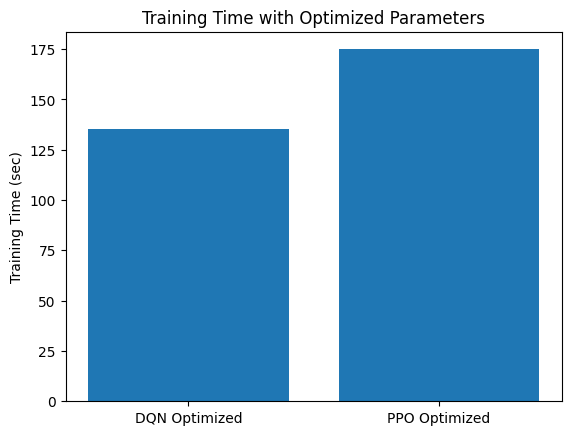

In [31]:
plt.bar(["DQN Optimized", "PPO Optimized"], [dqn_time_opt, ppo_time_opt])

plt.ylabel("Training Time (sec)")
plt.title("Training Time with Optimized Parameters")
plt.show()


## Graph - Rewards per Episode (During Training)

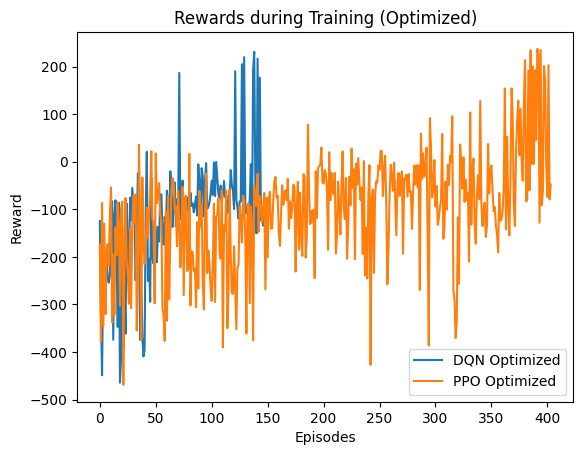

In [32]:
plt.plot(env_dqn.get_episode_rewards(), label="DQN Optimized")
plt.plot(env_ppo.get_episode_rewards(), label="PPO Optimized")

plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Rewards during Training (Optimized)")
plt.legend()
plt.show()

## Conclusion

Με την κατάλληλη επιλογή υπερπαραμέτρων παρατηρείται σημαντική βελτίωση στην απόδοση και των δύο αλγορίθμων.
Ο PPO παρουσιάζει σαφή υπεροχή στο περιβάλλον LunarLander-v3, επιτυγχάνοντας υψηλότερα rewards και σταθερότερη προσγείωση.
Ο DQN επωφελείται από μεγαλύτερο buffer και μικρότερο learning rate, αλλά παραμένει πιο ασταθής.